In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [64]:
sum_df = pd.read_csv('islands_df/sum_island_df.csv', delimiter=',')
test_df =  pd.read_csv('islands_df/island_test.csv', delimiter=',')

In [56]:
sum_df.head(10)

,dist,delta,delta_delta,dif_from_median,min_distance_from_signchanges,should_cut
0,0.821307,0.211402,0.000000e+00,0.181989,13,False
1,1.097101,0.275794,6.439259e-02,0.246381,12,False
2,1.386558,0.289456,1.366181e-02,0.260043,11,False
3,1.676014,0.289456,1.000000e-09,0.260043,10,False
4,1.944390,0.268376,2.108001e-02,0.238963,9,False
5,2.180823,0.236432,3.194402e-02,0.207019,8,False
6,2.417255,0.236432,6.000000e-10,0.207019,7,False
7,2.653687,0.236432,1.000000e-09,0.207019,6,False
8,2.887395,0.233708,2.724737e-03,0.204294,5,False
9,3.116361,0.228966,4.741409e-03,0.199553,4,False


In [68]:
scaler = StandardScaler()
columns = sum_df.columns[sum_df.columns != 'should_cut']
df_scaled = scaler.fit_transform(sum_df[columns].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=columns)
df_scaled.loc[:, "should_cut"] = sum_df.should_cut.to_numpy()
df_scaled

,dist,delta,delta_delta,dif_from_median,min_distance_from_signchanges,should_cut
0,-0.656096,-0.051821,-0.157861,-0.113693,1.503879,False
1,-0.598884,-0.010384,-0.105163,-0.071725,1.323577,False
2,-0.538837,-0.001593,-0.146681,-0.062821,1.143276,False
3,-0.478791,-0.001593,-0.157861,-0.062821,0.962974,False
4,-0.423117,-0.015158,-0.140610,-0.076560,0.782673,False
...,...,...,...,...,...,...
215,-0.463123,-0.157266,-0.133646,-0.231737,-0.840041,True
216,-0.279849,0.001650,0.044242,-0.071918,-0.659740,False
217,0.022047,0.124305,-0.001874,0.052307,-0.479438,False
218,0.665833,0.477822,0.291729,0.410353,-0.299137,False


In [69]:
X = df_scaled.drop(['should_cut'], axis = 1)
Y = df_scaled.should_cut

In [70]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=4)

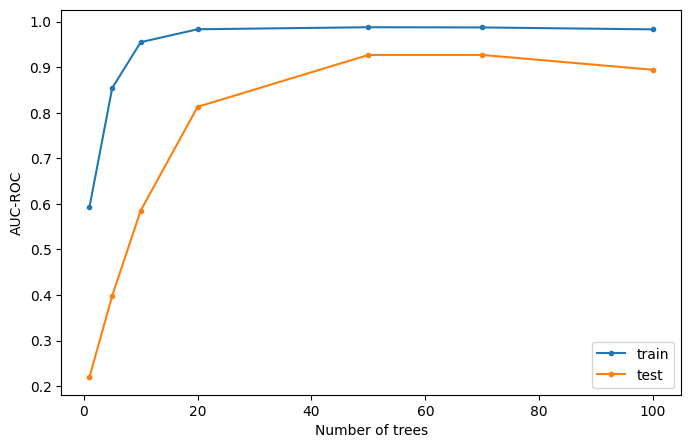

In [71]:
from catboost import CatBoostClassifier
n_trees = [1, 5, 10, 20, 50, 70, 100]
quals_train = []
quals_test = []
for n in n_trees:
    clf = CatBoostClassifier(iterations=n, logging_level='Silent')
    clf.fit(train_X, train_Y)
    q_train = roc_auc_score(train_Y, clf.predict_proba(train_X)[:, 1])
    q_test = roc_auc_score(test_Y, clf.predict_proba(test_X)[:, 1])
    quals_train.append(q_train)
    quals_test.append(q_test)

plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals_train, marker='.', label='train')
plt.plot(n_trees, quals_test, marker='.', label='test')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

In [ ]:
#Вывод по диаграмме выше - 50 деревьев достаточно

<AxesSubplot:>

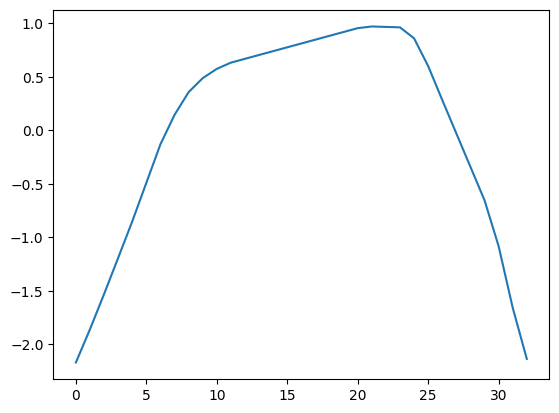

In [73]:
df_scaled_test.dist.plot()

In [72]:
clf = CatBoostClassifier(iterations=50, logging_level='Silent')
clf.fit(train_X, train_Y)
scaler = StandardScaler()
columns = test_df.columns[test_df.columns != 'should_cut']
df_scaled_test = scaler.fit_transform(test_df[columns].to_numpy())
df_scaled_test = pd.DataFrame(df_scaled_test, columns=columns)
clf.predict(df_scaled_test)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [10]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 2)



maj_pos = ticker.MultipleLocator(1)   
min_pos = ticker.MultipleLocator(1)    
matplotlib.rcParams.update({'font.size': 80})

matplotlib.rcParams['figure.figsize'] = [200, 100]
ax0[0].grid(linewidth = 5.0)
ax1[0].grid(linewidth = 5.0)

#ax1[0].set_xlim(0, 20)
#ax1[0].set_ylim(-1, 1)
#
#ax0[0].set_xlim(0, 20)
#ax1[0].set_ylim(-1, 1)

ax2[0].grid(linewidth = 5.0)
ax1[0].axhline(np.median(abs_deltas, axis = 0)[1], color='black', linewidth = 7.)
ax0[0].axhline(np.median(deltas_deltas), color='black', linewidth = 7.)
ax1[0].set_title("Deltas",fontsize=100)
ax2[0].set_title("Distances", fontsize=100)
ax0[0].plot(range(0, len(deltas_deltas)), deltas_deltas, linewidth=9.0)
ax1[0].plot([i for i,_ in deltas], [d for _,d in deltas], linewidth=9.0)
ax2[0].plot([i for i,_ in distances], [d for _,d in distances], linewidth=9.0)

ax0[1].grid(linewidth = 5.0)
ax1[1].grid(linewidth = 5.0)
ax2[1].grid(linewidth = 5.0)
ax1[1].axhline(np.median(abs_deltas_island, axis = 0)[1], color='black', linewidth = 7.)
ax1[1].set_title("Deltas",fontsize=100)
ax2[1].set_title("Distances", fontsize=100)
ax0[1].plot(range(0, len(deltas_deltas_islands)), deltas_deltas_islands, linewidth=9.0)
ax1[1].plot([i for i,_ in deltas_island], [d for _,d in deltas_island], linewidth=9.0)
ax2[1].plot([i for i,_ in distances_islands], [d for _,d in distances_islands], linewidth=9.0)